In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 10.0 MB/s 
     |████████████████████████████████| 944 kB 42.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#from dython import nominal

In [2]:
data = pd.read_csv('/content/DF_all_materials.csv')

In [3]:
material = "WOOD"

#wood density = 0.57 t/m3

data["vol_m"] = data[material] / 0.57
data["percentage"] = (data["vol_m"] / data["VOL"])*100

Drop columns not relevant for the current model

In [4]:
data = data.drop(columns=['EGID', 'VAR_NAME', 'GLASS', 'METAL', 'MINERAL', 'ROOFTILE'])
print(data)
print(data.shape)

      VOL  AREA_F  APT_NUM  ST_NUM  KREIS  ZIPCODE ROOF   YOC          POC  \
0    1328     119        5       5     10     8049    P  1933  1919 - 1945   
1    1016     109        5       4     10     8049    P  1938  1919 - 1945   
2     915      95        1       4     11     8050    P  1933  1919 - 1945   
3     422      72        1       4     11     8050    P  1891       < 1919   
4    5010     215        3       5      9     8047    P  1952  1946 - 1960   
..    ...     ...      ...     ...    ...      ...  ...   ...          ...   
402  1172     176        5       3      9     8048    P  1949  1946 - 1960   
403  1168     175        4       3      9     8048    P  1949  1946 - 1960   
404  1202     173        5       3      9     8048    P  1949  1946 - 1960   
405  1801     179        6       4      9     8048    P  1950  1946 - 1960   
406  1953     183        6       4      9     8048    P  1950  1946 - 1960   

      WOOD       vol_m  percentage  
0     4.38    7.684211    

Statistical description of the data

In [ ]:
data.describe()


,VOL,AREA_F,APT_NUM,ST_NUM,KREIS,ZIPCODE,YOC,WOOD,vol_m,percentage
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,350.000000,350.000000,350.000000
mean,1804.142506,172.208845,6.051597,4.665848,7.663391,8041.960688,1938.503686,26.506286,46.502256,3.185896
std,2600.570467,208.078881,11.296488,1.175023,3.108420,16.632315,19.557150,28.811206,50.545975,3.871936
min,74.000000,30.000000,1.000000,1.000000,2.000000,8002.000000,1850.000000,0.770000,1.350877,0.129618
25%,880.000000,109.500000,1.000000,4.000000,6.000000,8038.000000,1931.000000,6.320000,11.087719,0.920747
50%,1572.000000,165.000000,5.000000,5.000000,9.000000,8048.000000,1946.000000,16.095000,28.236842,2.038280
75%,2043.500000,184.000000,6.000000,5.000000,11.000000,8052.000000,1950.000000,35.080000,61.543860,4.030277
max,45753.000000,3865.000000,138.000000,11.000000,12.000000,8057.000000,1987.000000,187.960000,329.754386,39.682540


Eliminate NaN values

In [5]:
print(data.shape)
data = data.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
print(data.shape)

(407, 12)
(350, 12)


In [ ]:
data.isnull().sum()


VOL              0
AREA_F           0
APT_NUM          0
ST_NUM           0
KREIS            0
ZIPCODE          0
ROOF             0
YOC              0
POC              0
WOOD             0
material_n_m3    0
material_n_m2    0
dtype: int64

In [6]:
#SIZE AND STYLE

fontname = 'Liberation Sans'
horizontal = 20
title_size = 14
title_alg = 'center'
color = 'seagreen'
spacing = 0.5
tpad = 15

#DATA
material = "WOOD"

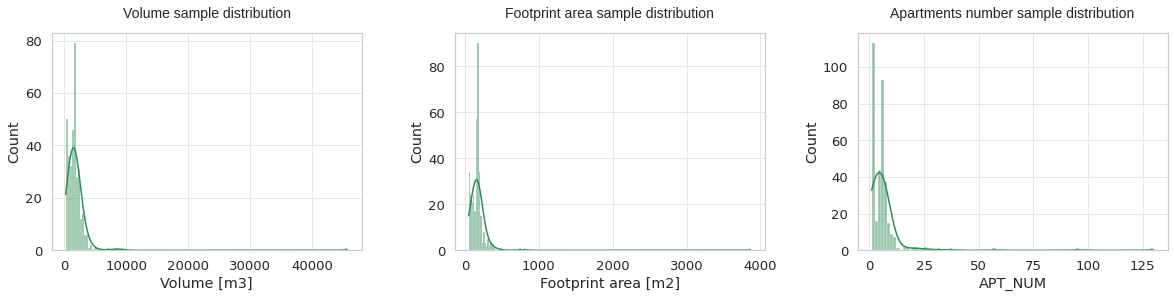

In [10]:
#HISTOGRAMS - FEATURES
new_data = data
f = plt.figure(figsize=(20,4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = 0.3, hspace = 0.3)
sns.set(font_scale=1.2)
# FIRST ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=new_data, x="VOL", kde=True, cbar = True, color = color).set_title(
  'Volume sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]')
    

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=new_data, x="AREA_F", kde=True, cbar = True, color = color).set_title(
  'Footprint area sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]')

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.histplot(data=new_data, x="APT_NUM", kde=True, cbar = True, color = color).set_title(
  'Apartments number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
f.savefig("w_org_dist.png")

Treat outliers with IQR


In [11]:
# FUNCTION

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#WOOD

old = data.shape[0]
l_wood,u_wood = outlier_treatment(data.WOOD)
print('Lower-upper range for WOOD: ', l_wood,u_wood)

data.drop(data[(data.WOOD < l_wood) | (data.WOOD > u_wood)].index , inplace=True)
wood_data = data
new = data.shape[0]

print(wood_data.describe(), '\n')
print('Removed: ', old - new, '\n')

# VOLUME
old = new
l_vol,u_vol = outlier_treatment(wood_data.VOL)
print('Lower-upper range for VOL: ', l_vol, u_vol)

wood_data.drop(wood_data[(wood_data.VOL < l_vol) | (wood_data.VOL > u_vol)].index , inplace=True)
vol_data = wood_data
new = vol_data.shape[0]

print(vol_data.describe(), '\n')
print('Removed: ', old - new, '\n')

#FOOTPRINT
old = new
l_area,u_area = outlier_treatment(vol_data.AREA_F)
print('Lower-upper range for AREA_F: ', l_area, u_area,'\n')

vol_data.drop(vol_data[(vol_data.AREA_F < l_area) | (vol_data.AREA_F > u_area)].index , inplace=True)
yoc_data = vol_data
new = yoc_data.shape[0]

print(yoc_data.describe(),'\n')
print('Removed: ', old - new, '\n')

# YOC
old = new
l_YOC,u_YOC = outlier_treatment(vol_data.YOC)
print('Lower-upper range for YOC: ', l_YOC, u_YOC,'\n')

yoc_data.drop(yoc_data[(yoc_data.YOC < l_YOC) | (vol_data.YOC > u_YOC)].index , inplace=True)
new_data = yoc_data
new = new_data.shape[0]

print(new_data.describe(),'\n')
print('Removed: ', old - new, '\n')


Lower-upper range for WOOD:  -36.82 78.22
               VOL      AREA_F     APT_NUM      ST_NUM       KREIS  \
count   327.000000  327.000000  327.000000  327.000000  327.000000   
mean   1625.036697  159.740061    5.275229    4.611621    7.703364   
std    1022.460871   79.585254    5.259881    1.041583    3.070854   
min     226.000000   50.000000    1.000000    1.000000    2.000000   
25%     876.000000  111.500000    1.000000    4.000000    6.000000   
50%    1596.000000  165.000000    5.000000    5.000000    9.000000   
75%    2003.000000  181.500000    6.000000    5.000000   11.000000   
max    9370.000000  798.000000   57.000000    7.000000   12.000000   

           ZIPCODE          YOC        WOOD       vol_m  percentage  
count   327.000000   327.000000  327.000000  327.000000  327.000000  
mean   8042.636086  1939.030581   20.817829   36.522507    2.694870  
std      16.355492    18.949861   18.052728   31.671453    2.914996  
min    8002.000000  1850.000000    0.770000    

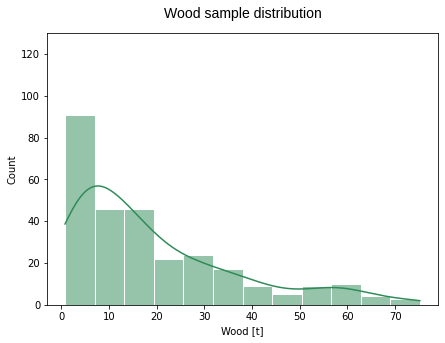

In [ ]:
#HISTOGRAM - LABEL

f = plt.figure(figsize=(7,5))
gs = f.add_gridspec(1, 1)

ax = f.add_subplot(gs[0, 0])
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    sns.histplot(data=new_data, x=material, kde=True, cbar = True, color = color).set_title(
  'Wood sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad) 
    ax.set(xlabel='Wood [t]')
    plt.ylim(0, 130)
    
f.savefig("w_label_dist.png")

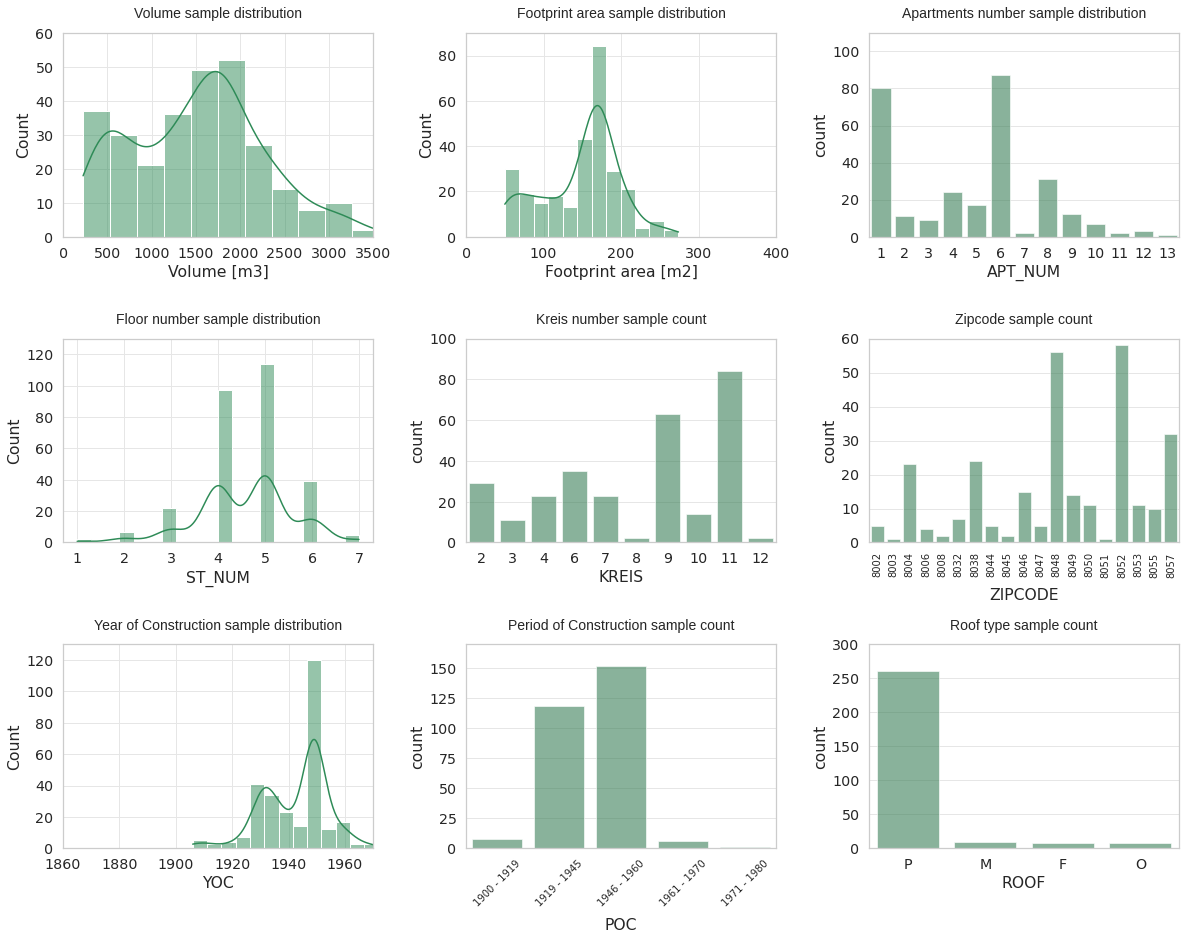

In [23]:
#HISTOGRAMS - FEATURES
sns.set(font_scale=1.3)
f = plt.figure(figsize=(20,15))
gs = f.add_gridspec(3, 3)
gs.update(wspace = 0.3, hspace = 0.5)

# FIRST ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=new_data, x="VOL", kde=True, cbar = True, color = color).set_title(
  'Volume sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]')
    plt.ylim(0, 60)
    plt.xlim(0, 3500)
    

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=new_data, x="AREA_F", kde=True, cbar = True, color = color).set_title(
  'Footprint area sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]')
    plt.ylim(0, 90)
    plt.xlim(0, 400)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.countplot(data=new_data, x="APT_NUM", color = color, alpha  = 0.6).set_title(
  'Apartments number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 110)


# SECOND ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 0])
    sns.histplot(data=new_data, x="ST_NUM", kde=True, cbar = True, color = color).set_title(
  'Floor number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 130)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 1])
    sns.countplot(data=new_data, x="KREIS", color = color, alpha  = 0.6).set_title(
  'Kreis number sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 100)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 2])
    sns.countplot(data=new_data, x="ZIPCODE", color = color, alpha  = 0.6).set_title(
  'Zipcode sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 60)
    plt.xticks(rotation=90, size = 10)
    ax.xaxis.labelpad=10.0

# THIRD ROW  

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 0])
    sns.histplot(data=new_data, x="YOC", kde=True, cbar = True, color = color).set_title(
  'Year of Construction sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xlim(1860, 1970)
    plt.ylim(0, 130)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 1])
    sns.countplot(data=new_data, x="POC", color = color, alpha  = 0.6, order = ["1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Period of Construction sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xticks(rotation=45, size = 10)
    ax.xaxis.labelpad=10.0
    plt.ylim(0, 170)
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 2])
    sns.countplot(data=new_data, x="ROOF", color = color, alpha  = 0.6).set_title(
  'Roof type sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 300)
    
f.savefig("w_features_dist.png")

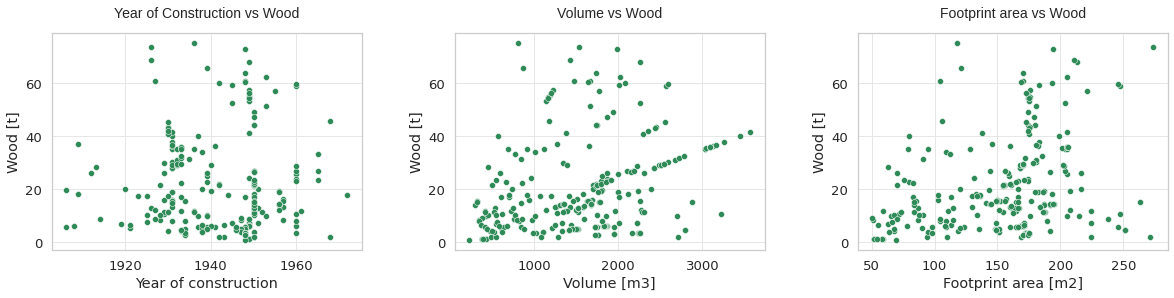

In [25]:
#SCATTERPLOT CONTINUOUS DATA
sns.set(font_scale=1.2)
f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = 0.3, hspace = 0.3)
material = "WOOD"

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.scatterplot(data=new_data, x="YOC", y = material, color = color).set_title(
  'Year of Construction vs Wood', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Year of construction', ylabel = 'Wood [t]')
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.scatterplot(data=new_data, x="VOL", y = material, color = color).set_title(
  'Volume vs Wood', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]', ylabel = 'Wood [t]')
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.scatterplot(data=new_data, x="AREA_F", y = material, color = color).set_title(
  'Footprint area vs Wood', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]', ylabel = 'Wood [t]')

f.savefig("w_cont_scatter.png")

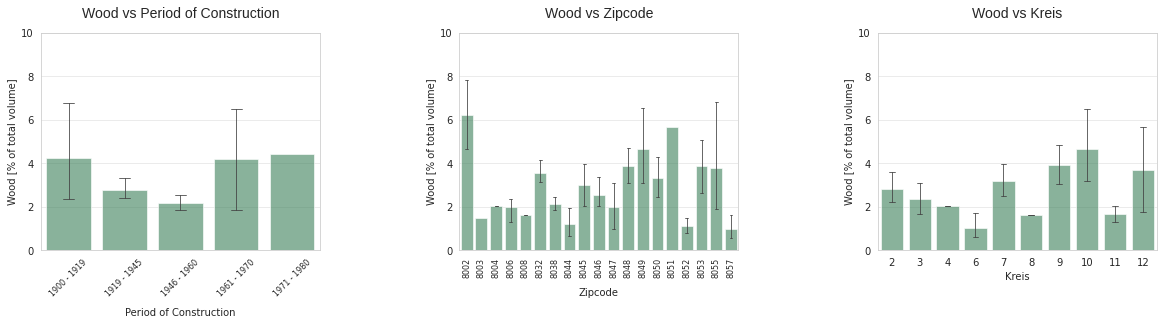

In [ ]:
#CATEGORICAL DATA

f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = spacing, hspace = spacing)


with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.barplot(data=new_data, x="POC", y = "percentage", color = color, alpha = 0.6, capsize=.2, errwidth=0.8,  order = ["1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Wood vs Period of Construction', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xticks(rotation=45, size = 8)
    ax.xaxis.labelpad=10.0
    ax.set(xlabel='Period of Construction', ylabel = 'Wood [% of total volume]')
    plt.ylim(0, 10)
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.barplot(data=new_data, x="ZIPCODE", y = "percentage", color = color, alpha = 0.6, capsize=.2, errwidth=0.8).set_title(
  'Wood vs Zipcode', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Zipcode', ylabel = 'Wood [% of total volume]')
plt.xticks(rotation=90, size = 8)
ax.xaxis.labelpad=10.0
plt.ylim(0, 10)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.barplot(data=new_data, x="KREIS", y = "percentage", color = color, alpha = 0.6, capsize=.2, errwidth=0.8).set_title(
  'Wood vs Kreis', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Kreis', ylabel = 'Wood [% of total volume]')
    plt.ylim(0, 10)

    f.savefig("w_categ_box.png")

Drop m / m3, m/m2

In [ ]:
new_data = new_data.drop(columns=['material_n_m2', 'material_n_m3'])

Correlation factor (nominal + numeric)

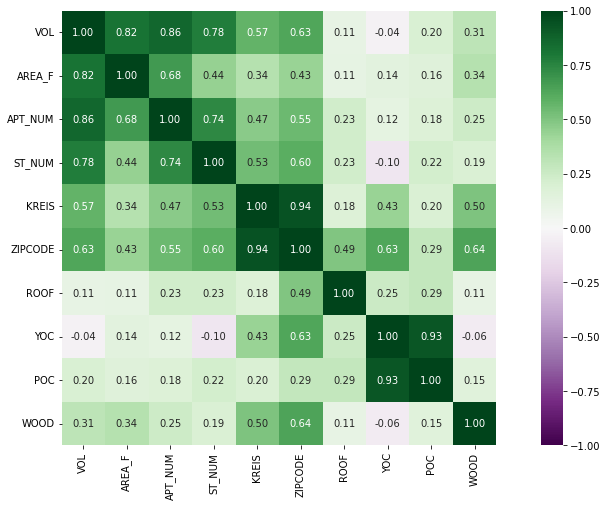

In [ ]:
# using dython library
from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio, associations
# Step 1: Instantiate a figure and axis object
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)

r = associations(new_data, nominal_columns=['ZIPCODE','ROOF', 'POC', 'KREIS'], numerical_columns=['VOL', 'YOC', 'AREA_F', 'WOOD', 'APT_NUM', 'ST_NUM'], symmetric_nom_nom = False, ax = ax, cmap = "PRGn")

#p = correlation_ratio(categories=data['ROOF'].tolist(), measurements=data['WOOD'].tolist())
#print(p)
#identify_nominal_columns(data)
#identify_numeric_columns(data)

fig.savefig("w_correl.png")

In [ ]:
print(new_data.shape)
print(new_data.head())

(286, 10)
    VOL  AREA_F  APT_NUM  ST_NUM  KREIS  ZIPCODE ROOF   YOC          POC  \
0  1328     119        5       5     10     8049    P  1933  1919 - 1945   
1  1016     109        5       4     10     8049    P  1938  1919 - 1945   
2   915      95        1       4     11     8050    P  1933  1919 - 1945   
5  1658     160        6       5      9     8047    P  1941  1919 - 1945   
6  1745     160        6       5      9     8047    P  1941  1919 - 1945   

    WOOD  
0   4.38  
1  34.20  
2  35.08  
5  36.27  
6   5.70  


In [ ]:
from google.colab import files

new_data.to_csv('wood.csv', encoding = 'utf-8-sig') 
files.download('wood.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>